In [1]:
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.__version__


2023-04-18 16:57:36.280690: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.12.0'

In [4]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [21]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


In [22]:
model = EfficientNetB0(include_top=False, weights="imagenet")
#model.summary()


In [23]:
IMG_SIZE = 224


data_dir = "/tf/dataset/cavity_images"

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    label_mode='categorical',
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    label_mode='categorical',
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
)
class_names = train_ds.class_names
NUM_CLASSES = len(class_names)



Found 20067 files belonging to 10 classes.
Using 16054 files for training.
Found 20067 files belonging to 10 classes.
Using 4013 files for validation.


In [24]:
print(train_ds)
print(test_ds)

for image_batch, labels_batch in train_ds.take(1):
  print(image_batch.shape, labels_batch.shape)
  
len(train_ds)  

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>
(64, 224, 224, 3) (64, 10)


2023-04-14 11:14:38.980665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [16054]
	 [[{{node Placeholder/_4}}]]
2023-04-14 11:14:38.981013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [16054]
	 [[{{node Placeholder/_4}}]]


251

2023-04-14 11:15:31.605499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [16054]
	 [[{{node Placeholder/_4}}]]
2023-04-14 11:15:31.606316: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [16054]
	 [[{{node Placeholder/_4}}]]


TypeError: only integer scalar arrays can be converted to a scalar index

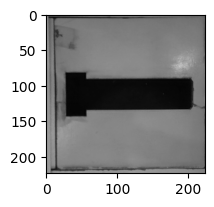

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [29]:
for image_batch, labels_batch in train_ds.take(1):
  print(image_batch[0].shape)
  print(labels_batch[0])
train_ds

(224, 224, 3)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


2023-04-14 11:16:16.939336: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [16054]
	 [[{{node Placeholder/_0}}]]
2023-04-14 11:16:16.940069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [16054]
	 [[{{node Placeholder/_0}}]]


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [10]:
train_ds, test_ds.take(0)


(<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>)

In [51]:
# One-hot / categorical encoding
def input_preprocess(image, label):
    label = tf.one_hot(tf.cast(label, tf.dtypes.int32), tf.cast(NUM_CLASSES, tf.dtypes.int32))
    print(image, label)
    return image, label

train_ds = train_ds.map(input_preprocess)
test_ds = test_ds.map(input_preprocess)
train_ds, test_ds

Tensor("args_0:0", shape=(None, 224, 224, 3), dtype=float32) Tensor("one_hot:0", shape=(None, 10, 10), dtype=float32)
Tensor("args_0:0", shape=(None, 224, 224, 3), dtype=float32) Tensor("one_hot:0", shape=(None, 10, 10), dtype=float32)


(<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10, 10), dtype=tf.float32, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10, 10), dtype=tf.float32, name=None))>)

In [33]:
def input_preprocess(image, label):
    label = tf.cast(label, tf.dtypes.int32)
    image = tf.cast(image, tf.dtypes.int32)
    #print(image, label)
    return image, label

train_ds = train_ds.map(input_preprocess)
test_ds = test_ds.map(input_preprocess)
train_ds, test_ds

(<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.int32, name=None), TensorSpec(shape=(None, 10), dtype=tf.int32, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.int32, name=None), TensorSpec(shape=(None, 10), dtype=tf.int32, name=None))>)

In [34]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15, input_shape= (IMG_SIZE, IMG_SIZE,3)),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [43]:

def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    #x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer,
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
#x = img_augmentation(inputs)




Epoch 1/8


2023-04-14 11:27:22.278244: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inEfficientNet/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


251/251 [==============================] - 46s 166ms/step - loss: 0.0286 - accuracy: 0.9919 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 2/8
251/251 [==============================] - 41s 162ms/step - loss: 0.0095 - accuracy: 0.9976 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 3/8
251/251 [==============================] - 41s 163ms/step - loss: 0.0110 - accuracy: 0.9981 - val_loss: 0.0066 - val_accuracy: 0.9993
Epoch 4/8
251/251 [==============================] - 41s 163ms/step - loss: 0.0126 - accuracy: 0.9980 - val_loss: 6.9721e-05 - val_accuracy: 1.0000
Epoch 5/8
251/251 [==============================] - 41s 163ms/step - loss: 0.0106 - accuracy: 0.9984 - val_loss: 8.7528e-08 - val_accuracy: 1.0000
Epoch 6/8
251/251 [==============================] - 41s 163ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.0046 - val_accuracy: 0.9998
Epoch 7/8
251/251 [==============================] - 41s 163ms/step - loss: 0.0093 - accuracy: 0.9989 - val_loss: 0.0041 - val_accuracy: 0

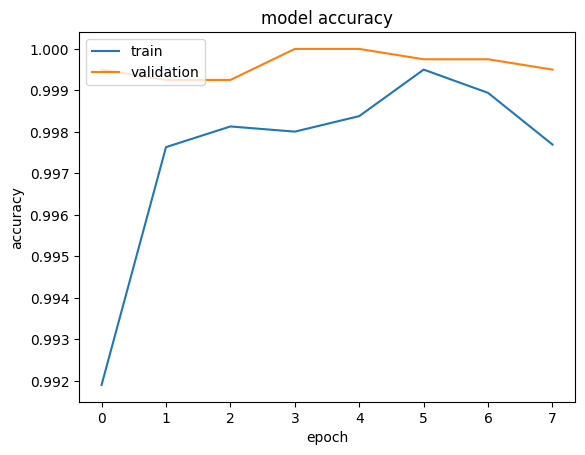

In [44]:

model = build_model(NUM_CLASSES)
#model.summary()

epochs = 8  # @param {type: "slider", min:8, max:80}

hist = model.fit(train_ds, epochs=epochs, validation_data=test_ds)
plot_hist(hist)

In [46]:
# !mkdir -p saved_model

#model.save("/home/erfan/Documents/Projects/AtworkTasks/PPT/saved_model/Pretrained_EfficientNetB0")
model.save("/tf/dev/PPT_bbox_classifier/saved_model/Pretrained_EfficientNetB0")



2023-04-14 11:33:31.179721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2023-04-14 11:33:31.230107: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,96]
	 [[{{node inputs}}]]
2023-04-14 11:33:31.267538: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,144]
	 [[{{node inputs}}]]
2023-04-14 11:33:3

2023-04-14 11:33:34.896250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2023-04-14 11:33:35.066872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,96]
	 [[{{node inputs}}]]
2023-04-14 11:33:35.224496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,144]
	 [[{{node inputs}}]]
2023-04-14 11:33:3

2023-04-14 11:33:37.939776: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1280]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /tf/dev/PPT_bbox_classifier/saved_model/Pretrained_EfficientNetB0/assets


INFO:tensorflow:Assets written to: /tf/dev/PPT_bbox_classifier/saved_model/Pretrained_EfficientNetB0/assets


TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

In [45]:
model.save("/tf/dev/PPT_bbox_classifier/saved_model/Pretrained_EfficientNetB0.h5")

TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

In [16]:
tf.saved_model.save(model, "/tf/dev/PPT_bbox_classifier/saved_model/Pretrained_EfficientNetB0")

2023-04-14 11:08:38.999669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_rotation_input' with dtype float and shape [?,224,224,3]
	 [[{{node random_rotation_input}}]]
2023-04-14 11:08:39.127930: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,224,224,3]
	 [[{{node inputs}}]]
2023-04-14 11:08:39.144705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_rotation_input' with dtype float

2023-04-14 11:08:44.650187: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1152]
	 [[{{node inputs}}]]
2023-04-14 11:08:44.674869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,7,7,192]
	 [[{{node inputs}}]]
2023-04-14 11:08:44.705191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1152]
	 [[{{node inputs}}]]
2023-04-14

2023-04-14 11:08:50.238712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,672]
	 [[{{node inputs}}]]
2023-04-14 11:08:50.402862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1152]
	 [[{{node inputs}}]]
2023-04-14 11:08:50.481019: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,7,7,192]
	 [[{{node inputs}}]]
2023-04-14 

INFO:tensorflow:Assets written to: /tf/dev/PPT_bbox_classifier/saved_model/Pretrained_EfficientNetB0/assets


INFO:tensorflow:Assets written to: /tf/dev/PPT_bbox_classifier/saved_model/Pretrained_EfficientNetB0/assets


In [147]:
#cavity_url = "/home/erfan/Documents/Projects/AtworkTasks/dataset/PPT/cavity_images/F20_20_horizontal/1442-1.jpg"
cavity_url = "/tf/dataset/M20_vertical/M20_vertical_010.jpg"

image = tf.keras.preprocessing.image.load_img(cavity_url)
image = tf.image.resize(
    image,
    [224, 224],
    # method=ResizeMethod.BILINEAR,
    preserve_aspect_ratio=False,
    antialias=False,
    name=None,
)

img_array = tf.keras.utils.img_to_array(image)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))


1/1 [==============================] - 0s 22ms/step
This image most likely belongs to M20_vertical with a 23.20 percent confidence.


1/1 [==============================] - 0s 26ms/step
This image most likely belongs to M20_100_horizontal with a 19.82 percent confidence.
